# Problem Statement

#### Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
df=pd.read_csv('TaxiFare.csv')

In [3]:
pd. get_option("display.max_columns")

20

# EDA

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


#### Finding the distance between pickup and drop

In [10]:
df["dist"]=abs(df.longitude_of_pickup-df.longitude_of_dropoff)+abs(df.latitude_of_pickup-df.latitude_of_dropoff)
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508


### Data Wrangling

In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dist                    0
dtype: int64

#### No missing values

<AxesSubplot:>

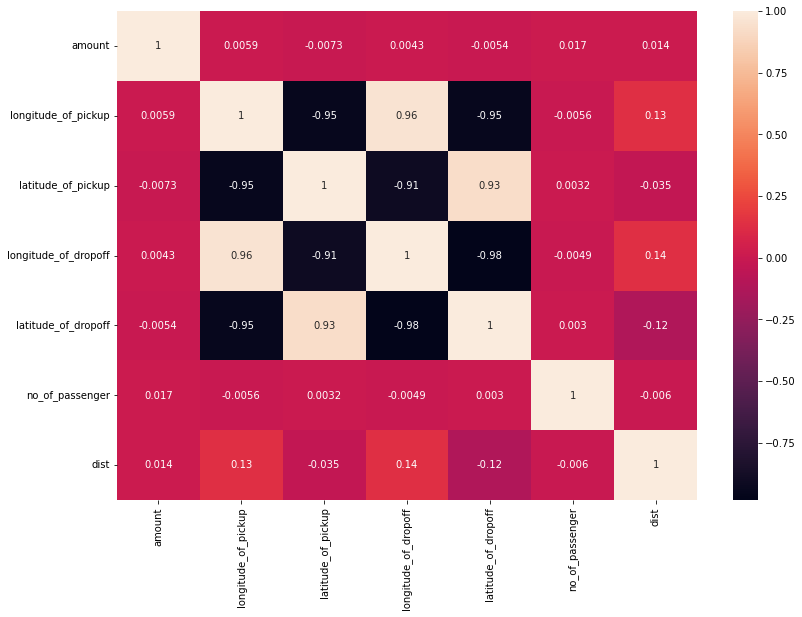

In [12]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

#### Finding the day for each date

In [13]:
day=[]
for i in df.date_time_of_pickup:
    day.append(pd.Timestamp((i.split()[0])+" "+(i.split()[1])).day_name())
df["Day"]=day

In [14]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday
...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday


In [15]:
day=[]
for i in df.date_time_of_pickup:
    l=i.split()[0].split("-")[2]
    day.append(int(l))
df["day_num"]=day
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6


#### Converting time into sessions of four

In [16]:
timeofday=[]
for i in df.date_time_of_pickup:
    l=int(i.split()[1].split(":")[0])
    timeofday.append(l)
df['Session']=timeofday
df['Session'] = (df['Session'] + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [17]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6,Early Morning


In [18]:
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)

In [19]:
df=df.drop(df[df.amount<=0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6,Early Morning


In [20]:
df=df.drop(df[df.dist==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [21]:
df=df.drop(df[df.no_of_passenger==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [22]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [23]:
df.drop(["longitude_of_pickup","longitude_of_dropoff","latitude_of_pickup","latitude_of_dropoff"], axis=1,inplace=True)
df

,amount,no_of_passenger,dist,Day,day_num,Session
0,4.5,1,0.011742,Monday,15,Evening
1,16.9,1,0.107481,Tuesday,5,Evening
2,5.7,2,0.019212,Thursday,18,Late Night
3,7.7,1,0.029386,Saturday,21,Early Morning
4,5.3,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...
49994,8.5,1,0.025552,Saturday,13,Evening
49995,15.0,1,0.059464,Wednesday,12,Night
49996,7.5,1,0.010223,Monday,22,Evening
49997,6.9,1,0.024645,Sunday,30,Early Morning


In [24]:
df1=df.copy()

In [25]:
df = pd.get_dummies(df, columns=['Session'],drop_first=True)
df.head()

,amount,no_of_passenger,dist,Day,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon
0,4.5,1,0.011742,Monday,15,1,0,0,0,0
1,16.9,1,0.107481,Tuesday,5,1,0,0,0,0
2,5.7,2,0.019212,Thursday,18,0,1,0,0,0
3,7.7,1,0.029386,Saturday,21,0,0,0,0,0
4,5.3,1,0.027194,Tuesday,9,0,0,0,0,0


In [26]:
df = pd.get_dummies(df, columns=['Day'],drop_first=True)
df.head()

,amount,no_of_passenger,dist,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,4.5,1,0.011742,15,1,0,0,0,0,1,0,0,0,0,0
1,16.9,1,0.107481,5,1,0,0,0,0,0,0,0,0,1,0
2,5.7,2,0.019212,18,0,1,0,0,0,0,0,0,1,0,0
3,7.7,1,0.029386,21,0,0,0,0,0,0,1,0,0,0,0
4,5.3,1,0.027194,9,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

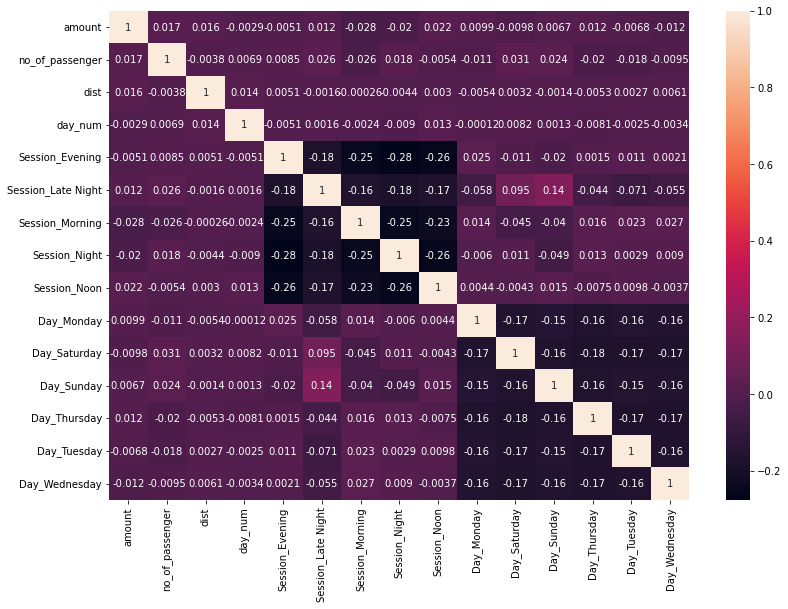

In [27]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

# Visualisation

In [28]:
df1

,amount,no_of_passenger,dist,Day,day_num,Session
0,4.5,1,0.011742,Monday,15,Evening
1,16.9,1,0.107481,Tuesday,5,Evening
2,5.7,2,0.019212,Thursday,18,Late Night
3,7.7,1,0.029386,Saturday,21,Early Morning
4,5.3,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...
49994,8.5,1,0.025552,Saturday,13,Evening
49995,15.0,1,0.059464,Wednesday,12,Night
49996,7.5,1,0.010223,Monday,22,Evening
49997,6.9,1,0.024645,Sunday,30,Early Morning


### 1.On which day of the week the cab driver has earned a profit

In [29]:
a=df1.groupby("Day")["amount"].sum()
a=pd.DataFrame(data=a)
a=a.reset_index()

In [30]:
a

,Day,amount
0,Friday,84558.02
1,Monday,74500.18
2,Saturday,82606.54
3,Sunday,72681.13
4,Thursday,83798.06
5,Tuesday,74942.45
6,Wednesday,77188.23


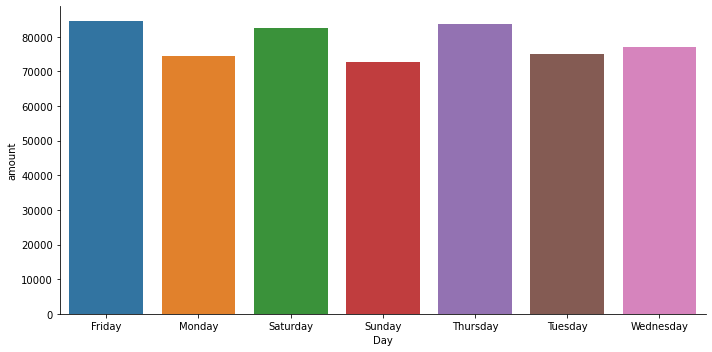

In [31]:
sns.catplot(x="Day",y="amount",data=a,kind="bar",aspect=2)

##### The cabdriver has received more profits on "Friday"

### 2.Which session has the cabdriver received more profits?

In [32]:
b=df1.groupby("Session")["amount"].sum()
b=pd.DataFrame(data=b)
b=b.reset_index()

In [33]:
b

,Session,amount
0,Early Morning,48473.73
1,Evening,117100.09
2,Late Night,60104.91
3,Morning,96353.34
4,Night,116510.65
5,Noon,111731.89


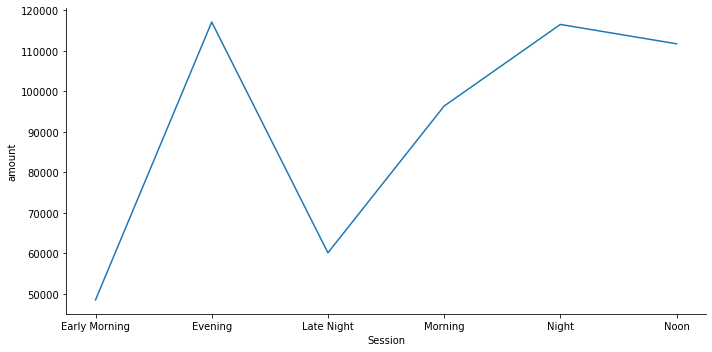

In [34]:
sns.relplot(x="Session",y="amount",kind="line",data=b,aspect=2)

##### The cabdrivers have received more profit during "evening"

### 3.On which day have the cab drivers travelled the maximum distance?

In [35]:
c=df1.groupby("Day")["dist"].sum()
c=pd.DataFrame(data=c)
c=c.reset_index()

In [36]:
c

,Day,dist
0,Friday,1820.710894
1,Monday,1139.237518
2,Saturday,2088.367452
3,Sunday,1435.082856
4,Thursday,1322.868840
5,Tuesday,1858.740722
6,Wednesday,2215.502275


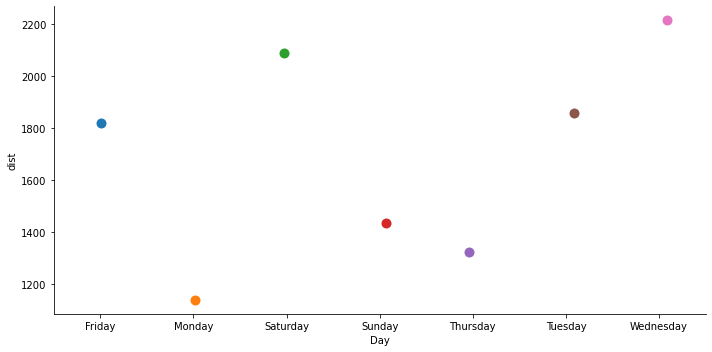

In [37]:
sns.catplot(x="Day",y="dist",data=c,aspect=2,s=10)

##### The maximum distance has been covered on "wednesdays"

### 4.How many passengers have travelled for each session?

In [38]:
d=df1.groupby("Session")["no_of_passenger"].sum()
d=pd.DataFrame(data=d)
d=d.reset_index()

In [39]:
d

,Session,no_of_passenger
0,Early Morning,6099
1,Evening,17615
2,Late Night,9116
3,Morning,14321
4,Night,18197
5,Noon,15736


<AxesSubplot:xlabel='no_of_passenger', ylabel='Session'>

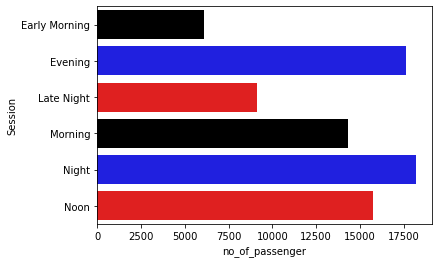

In [40]:
sns.barplot(x="no_of_passenger", y="Session", data=d , color="r",ci = 95,orient='h',palette=["k", "b", "r"])

##### The number of passengers per trip is high during "night"

# Creating Models

#### Splitting the data

In [41]:
X=df.drop("amount",axis=1)
y=df["amount"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

### Preprocessing

#### Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

### 1.Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression 
model= LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [45]:
model.score(X_train, y_train)

-0.00623087574234904

In [46]:
model.score(X_test, y_test)

-0.012109793307718997

### 2.Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.00665131336343272


In [48]:
print(poly_clf.score(X_test2, y_test))

-1.5990087013362242e-05


### 3.Ridge

In [49]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [50]:
pred = ridgeReg.predict(x_test)
ridgeReg.score(x_train,y_train)

0.0034185585641115512

In [51]:
ridgeReg.score(x_test,y_test)

0.002809542733976822

### 4.Decision tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dTree = DecisionTreeRegressor(random_state = 0,max_depth=7,min_samples_leaf=6)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.7802953328975857
0.7518663135712721


### 5.Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
# fit the regressor with x and y data

In [54]:
regressor.fit(X_train, y_train)
#Train data
regressor.score(X_train,y_train)*100

96.43377603437602

In [57]:
regressor.fit(X_test, y_test)
#Test Data
regressor.score(X_test,y_test)*100

96.25638607332107

## Out of these models Random Forest algorithm gives the best score 
## So Random Forest is the most suitable model for the problem statement

# Result

Train score:96.43377603437602

Test score:96.25638607332107